<h3>COVID-19 Data Analysis</h3>
<p><i>Author: Mesuga, Reymond R.</i></p><br>
<div>This study aims to determine the countries with the highest and lowest  total cases, total deaths, daily cases, daily deaths, weekly cases, weekly deaths, biweekly cases and biweekly deaths. The dataset used in this study is gathered from (https://data.world/markmarkoh/coronavirus-data).</div>



In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns 


<h2>Data Preparation and Cleaning</h2>
<h3>Importing the dataset</h3>

In [3]:
covid19_df = pd.read_csv("COVID19.csv")

In [4]:
covid19_df

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2020-02-24,Afghanistan,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
73721,2021-03-10,Zimbabwe,20.0,0.0,36341.0,1489.0,162.0,11.0,381.0,33.0
73722,2021-03-11,Zimbabwe,36.0,3.0,36377.0,1492.0,154.0,9.0,383.0,34.0
73723,2021-03-12,Zimbabwe,46.0,4.0,36423.0,1496.0,175.0,12.0,379.0,33.0
73724,2021-03-13,Zimbabwe,48.0,5.0,36471.0,1501.0,211.0,16.0,413.0,38.0


In [5]:
covid19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73726 entries, 0 to 73725
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             73726 non-null  object 
 1   location         73726 non-null  object 
 2   new_cases        73717 non-null  float64
 3   new_deaths       64648 non-null  float64
 4   total_cases      73719 non-null  float64
 5   total_deaths     64490 non-null  float64
 6   weekly_cases     72716 non-null  float64
 7   weekly_deaths    72716 non-null  float64
 8   biweekly_cases   71323 non-null  float64
 9   biweekly_deaths  71323 non-null  float64
dtypes: float64(8), object(2)
memory usage: 5.6+ MB


In [6]:
covid19_df.describe()

,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
count,73717.000000,64648.000000,7.371900e+04,6.449000e+04,7.271600e+04,72716.000000,7.132300e+04,71323.000000
mean,5172.018286,132.052082,6.552546e+05,1.937680e+04,3.628425e+04,814.081220,7.305211e+04,1640.785665
std,32304.463913,723.035537,4.603780e+06,1.134412e+05,2.240899e+05,4627.067406,4.492332e+05,9270.537149
min,-74347.000000,-1918.000000,1.000000e+00,1.000000e+00,-4.356100e+04,-1625.000000,-4.849000e+03,-1616.000000
25%,2.000000,0.000000,7.210000e+02,3.800000e+01,4.200000e+01,0.000000,9.700000e+01,1.000000
50%,59.000000,2.000000,8.135000e+03,2.530000e+02,5.060000e+02,7.000000,1.067000e+03,16.000000
75%,675.000000,16.000000,8.748250e+04,2.409750e+03,4.908000e+03,86.000000,9.917000e+03,177.000000
max,880902.000000,17895.000000,1.198752e+08,2.653652e+06,5.176951e+06,100968.000000,9.880398e+06,197872.000000


<h3>Removing the null values in the dataset</h3>

In [7]:
# Checking null values
covid19_df.isnull().sum()

date                  0
location              0
new_cases             9
new_deaths         9078
total_cases           7
total_deaths       9236
weekly_cases       1010
weekly_deaths      1010
biweekly_cases     2403
biweekly_deaths    2403
dtype: int64

In [8]:
# Removing null values
covid19_df["new_cases"].fillna(0, inplace=True)
covid19_df["new_deaths"].fillna(0, inplace=True)
covid19_df["total_cases"].fillna(0, inplace=True)
covid19_df["total_deaths"].fillna(0, inplace=True)
covid19_df["weekly_cases"].fillna(0, inplace=True)
covid19_df["weekly_deaths"].fillna(0, inplace=True)
covid19_df["biweekly_cases"].fillna(0, inplace=True)
covid19_df["biweekly_deaths"].fillna(0, inplace=True)

In [9]:
# Checking again
covid19_df.isnull().sum()

date               0
location           0
new_cases          0
new_deaths         0
total_cases        0
total_deaths       0
weekly_cases       0
weekly_deaths      0
biweekly_cases     0
biweekly_deaths    0
dtype: int64

<h3>Check the data types and convert it into integers</h3>

In [10]:
# Type Check
covid19_df["new_cases"].dtypes
covid19_df["new_deaths"].dtypes
covid19_df["total_cases"].dtypes
covid19_df["total_deaths"].dtypes
covid19_df["weekly_cases"].dtypes
covid19_df["weekly_deaths"].dtypes
covid19_df["biweekly_cases"].dtypes
covid19_df["biweekly_deaths"].dtypes

dtype('float64')

In [11]:
# Set types into integer
covid19_df["new_cases"] = covid19_df["new_cases"].fillna(0).astype(np.int64)
covid19_df["new_deaths"] = covid19_df["new_deaths"].fillna(0).astype(np.int64)
covid19_df["total_cases"] = covid19_df["total_cases"].fillna(0).astype(np.int64)
covid19_df["total_deaths"] = covid19_df["total_deaths"].fillna(0).astype(np.int64)
covid19_df["weekly_cases"] = covid19_df["weekly_cases"].fillna(0).astype(np.int64)
covid19_df["weekly_deaths"] = covid19_df["weekly_deaths"].fillna(0).astype(np.int64)
covid19_df["biweekly_cases"] = covid19_df["biweekly_cases"].fillna(0).astype(np.int64)
covid19_df["biweekly_deaths"] = covid19_df["biweekly_deaths"].fillna(0).astype(np.int64)

In [12]:
# Type Check Agin
covid19_df["new_cases"].dtypes
covid19_df["new_deaths"].dtypes
covid19_df["total_cases"].dtypes
covid19_df["total_deaths"].dtypes
covid19_df["weekly_cases"].dtypes
covid19_df["weekly_deaths"].dtypes
covid19_df["biweekly_cases"].dtypes
covid19_df["biweekly_deaths"].dtypes

dtype('int64')

In [13]:
covid19_df["date"] = pd.to_datetime(covid19_df["date"], format = '%Y-%m-%d')
covid19_df = covid19_df.replace([np.inf, -np.inf], np.nan)
covid19_df.fillna(0)

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2020-02-24,Afghanistan,1,0,1,0,0,0,0,0
1,2020-02-25,Afghanistan,0,0,1,0,0,0,0,0
2,2020-02-26,Afghanistan,0,0,1,0,0,0,0,0
3,2020-02-27,Afghanistan,0,0,1,0,0,0,0,0
4,2020-02-28,Afghanistan,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
73721,2021-03-10,Zimbabwe,20,0,36341,1489,162,11,381,33
73722,2021-03-11,Zimbabwe,36,3,36377,1492,154,9,383,34
73723,2021-03-12,Zimbabwe,46,4,36423,1496,175,12,379,33
73724,2021-03-13,Zimbabwe,48,5,36471,1501,211,16,413,38


<h3>Checking for the unique locations in the dataset</h3>
<p>We can see that not all locations in the dataset is a country. Some of these are either a continent or a union of many countries.  </p>

In [14]:
covid19_df.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Asia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe', 'European Union', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Gu

<h3><strong>Separating the columns with total values</strong></h3>
<p>This is the table for total deaths and total cases for each location. Also, the non-countries were also removed in the dataset.</p>

In [15]:
countries_total_df = covid19_df.groupby("location").sum().reset_index()[["location","total_cases", "total_deaths"]]
# Removing the location "World" in the dataset
countries_total_df = countries_total_df.drop(195)
# Removing the location "North America" in the dataset
countries_total_df = countries_total_df.drop(130)
# Removing the location "Europe" in the dataset
countries_total_df = countries_total_df.drop(60)
# Removing the location "Asia" in the dataset
countries_total_df = countries_total_df.drop(9)
# Removing the location "South America" in the dataset
countries_total_df = countries_total_df.drop(165)
# Removing the location "European Union" in the dataset
countries_total_df = countries_total_df.drop(61)
# Removing the location "Africa" in the dataset
countries_total_df = countries_total_df.drop(1)

countries_total_df

,location,total_cases,total_deaths
0,Afghanistan,12488780,471323
2,Albania,10008196,199035
3,Algeria,18492555,590044
4,Andorra,1410351,22848
5,Angola,2788570,71196
...,...,...,...
193,Venezuela,21740308,195892
194,Vietnam,364377,7463
196,Yemen,543773,154447
197,Zambia,6621342,112247


<h3><strong>Separating the columns with average values</strong></h3>
<p>This is the table for daily and weekly average cases for each country. Also, the non-countries were also removed in the dataset.</p>

In [44]:
countries_mean_df = covid19_df.groupby("location").mean().reset_index()[["location", "new_cases", "new_deaths", "weekly_cases", "weekly_deaths", "biweekly_cases","biweekly_deaths"]]
# Removing the location "World" in the dataset
countries_mean_df = countries_mean_df.drop(195)
# Removing the location "North America" in the dataset
countries_mean_df = countries_mean_df.drop(130)
# Removing the location "Europe" in the dataset
countries_mean_df = countries_mean_df.drop(60)
# Removing the location "Asia" in the dataset
countries_mean_df = countries_mean_df.drop(9)
# Removing the location "South America" in the dataset
countries_mean_df = countries_mean_df.drop(165)
# Removing the location "European Union" in the dataset
countries_mean_df = countries_mean_df.drop(61)
# Removing the location "Africa" in the dataset
countries_mean_df = countries_mean_df.drop(1)

countries_mean_df

,location,new_cases,new_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,Afghanistan,145.415584,6.381818,1016.781818,44.594805,2031.155844,89.085714
2,Albania,316.641509,5.512129,2179.000000,37.743935,4262.142857,73.126685
3,Algeria,300.169271,7.906250,2093.406250,55.195312,4166.994792,109.898438
4,Andorra,29.804233,0.298942,206.629630,2.076720,409.732804,4.140212
5,Angola,59.388889,1.447222,412.625000,10.066667,820.319444,19.983333
...,...,...,...,...,...,...,...
193,Venezuela,397.210383,3.907104,2757.210383,27.010929,5450.994536,53.120219
194,Vietnam,6.124700,0.083933,42.587530,0.587530,84.247002,1.175060
196,Yemen,8.365782,2.032448,55.327434,13.823009,104.622419,27.129794
197,Zambia,234.245856,3.198895,1619.607735,22.146409,3180.370166,43.616022


<h2>Exploratory Analysis and Visualization</h2>
<h3><strong>Q: How many countries have no total tests result in the dataset?</strong></h3>

In [45]:
total_cases_missing = countries_total_df.isna().sum()["location"]

In [46]:
print("The data for total tests is missing for {} countries.".format(int(total_cases_missing)))

The data for total tests is missing for 0 countries.


<h3><strong>Q: What is the total cases all over the world?</strong></h3>

In [47]:
total_world_cases = countries_total_df["total_cases"].sum()

In [48]:
print("The total world cases is {}.".format(int(total_world_cases)))

The total world cases is 15255584688.


<h3><strong>Q: What is the total deaths all over the world?</strong></h3>

In [49]:
total_death_cases = countries_total_df["total_deaths"].sum()

In [50]:
print("The total deaths all over the world is {}.".format(int(total_death_cases)))

The total deaths all over the world is 390234198.


<h3><strong>Q: What is the average daily cases all over the world?</strong></h3>

In [51]:
mean_daily_cases = countries_mean_df["new_cases"].sum()

In [52]:
print("The average daily world cases is {}.".format(int(mean_daily_cases)))

The average daily world cases is 299351.


<h3><strong>Q: What is the average daily deaths all over the world?</strong></h3>

In [53]:
mean_daily_deaths = countries_mean_df["new_deaths"].sum()

In [54]:
print("The average daily world deaths is {}.".format(int(mean_daily_deaths)))

The average daily world deaths is 6708.


<h3><strong>Q: What is the average weekly cases all over the world?</strong></h3>

In [55]:
mean_weekly_cases = countries_mean_df["weekly_cases"].sum()

In [56]:
print("The average weekly world cases is {}.".format(int(mean_weekly_cases)))

The average weekly world cases is 2072043.


<h3><strong>Q: What is the average weekly deaths all over the world?</strong></h3>

In [57]:
mean_weekly_deaths = countries_mean_df["weekly_deaths"].sum()

In [58]:
print("The average weekly world deaths is {}.".format(int(mean_weekly_deaths)))

The average weekly world deaths is 46512.


<h3><strong>Q: What are the 10 countries with the highest daily cases?</strong></h3>

In [59]:
most_daily_cases = countries_mean_df.sort_values(by="new_cases", ascending = False)
most_daily_cases.head(10)

,location,new_cases,new_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
188,United States,70427.688995,1279.636364,490359.808612,8890.794258,974196.449761,17614.777512
25,Brazil,29982.689295,726.446475,206110.749347,4983.678851,403430.953003,9750.853786
80,India,27769.119512,387.134146,193121.968293,2703.087805,383919.402439,5392.946341
146,Russia,10614.623472,221.413203,73807.168704,1527.444988,146407.970660,3005.293399
187,United Kingdom,10444.278729,307.464548,72813.058680,2145.454768,144922.227384,4269.850856
64,France,9932.389423,217.747596,68145.372596,1512.985577,133660.764423,2993.182692
87,Italy,7880.542787,249.743276,53925.728606,1731.459658,105286.501222,3424.555012
168,Spain,7803.196078,177.102941,54479.205882,1235.252451,108548.860294,2444.987745
68,Germany,6244.169492,177.876513,43173.590799,1237.113801,85254.615012,2447.927361
38,Colombia,6158.139037,163.483957,42873.176471,1139.155080,85287.561497,2265.689840


Text(0.5, 1.0, 'Figure 1: Top 10 Countries with Highest Daily Cases of COVID19')

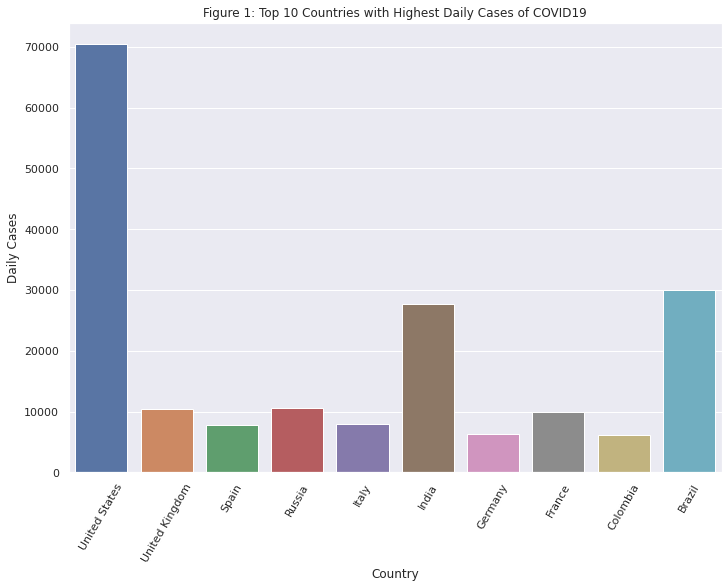

In [133]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax1 = sns.barplot(x = most_daily_cases['location'].head(10).sort_values(ascending = False),
                 y = most_daily_cases['new_cases'].head(10).sort_values(ascending = True))
ax1.set_xlabel('Country')
ax1.set_ylabel("Daily Cases")
plt.xticks(rotation = 60)
ax1.set_title("Figure 1: Top 10 Countries with Highest Daily Cases of COVID19")


<h3><strong>Q: What are the 10 countries with the least daily cases?</strong></h3>

In [32]:
most_daily_cases.tail(10)

,location,new_cases,new_deaths,total_cases,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
71,Grenada,0.413408,0.002793,52.407821,2.863128,0.019553,5.589385,0.039106
62,Fiji,0.182825,0.005540,32.634349,1.257618,0.038781,2.362881,0.077562
96,Laos,0.134831,0.000000,27.185393,0.865169,0.000000,1.584270,0.000000
148,Saint Kitts and Nevis,0.121127,0.000000,21.754930,0.797183,0.000000,1.436620,0.000000
162,Solomon Islands,0.116883,0.000000,15.233766,0.740260,0.000000,1.409091,0.000000
192,Vatican,0.072193,0.000000,17.112299,0.491979,0.000000,0.978610,0.000000
111,Marshall Islands,0.028986,0.000000,3.623188,0.130435,0.000000,0.260870,0.000000
151,Samoa,0.025641,0.000000,2.162393,0.136752,0.000000,0.230769,0.000000
191,Vanuatu,0.024000,0.000000,1.112000,0.128000,0.000000,0.128000,0.000000
115,Micronesia (country),0.018868,0.000000,1.000000,0.037736,0.000000,0.037736,0.000000


Text(0.5, 1.0, 'Figure 2: Top 10 Countries with Least Daily Cases of COVID19')

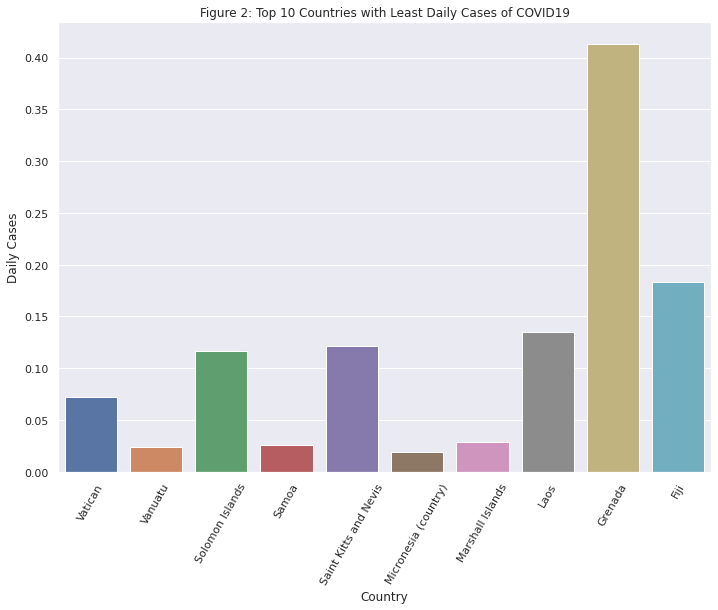

In [134]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax1 = sns.barplot(x = most_daily_cases['location'].tail(10).sort_values(ascending = False),
                 y = most_daily_cases['new_cases'].tail(10).sort_values(ascending = True))
ax1.set_xlabel('Country')
ax1.set_ylabel("Daily Cases")
plt.xticks(rotation = 60)
ax1.set_title("Figure 2: Top 10 Countries with Least Daily Cases of COVID19")


<h3><strong>Q: What are the 10 countries with the highest total cases?</strong></h3>

In [33]:
most_cases_countries = countries_total_df.sort_values(by="total_cases", ascending = False)

In [34]:
most_cases_countries.head(10)

,location,total_cases,total_deaths
188,United States,3640140841,80313718
80,India,1874560534,28458762
25,Brazil,1583032927,44003463
146,Russia,575119978,10380608
64,France,455067990,15009365
187,United Kingdom,448325169,19246055
168,Spain,387554921,13207161
87,Italy,343710073,17136931
38,Colombia,306971144,8542504
183,Turkey,295781548,3974929


Text(0.5, 1.0, 'Figure 3: Top 10 Countries with Highest Total Cases of COVID19')

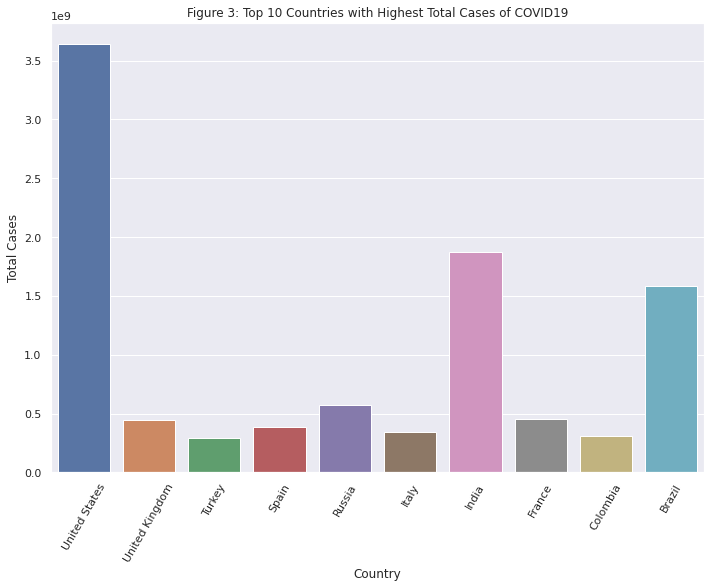

In [135]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax1 = sns.barplot(x = most_cases_countries['location'].head(10).sort_values(ascending = False),
                 y = most_cases_countries['total_cases'].head(10).sort_values(ascending = True))
ax1.set_xlabel('Country')
ax1.set_ylabel("Total Cases")
plt.xticks(rotation = 60)
ax1.set_title("Figure 3: Top 10 Countries with Highest Total Cases of COVID19")


<h3><strong>Q: What are the 10 countries with the least total cases?</strong></h3>

In [35]:
most_cases_countries.tail(10)

,location,total_cases,total_deaths
179,Timor,13344,0
62,Fiji,11781,427
96,Laos,9678,0
148,Saint Kitts and Nevis,7723,0
192,Vatican,6400,0
162,Solomon Islands,2346,0
111,Marshall Islands,500,0
151,Samoa,253,0
191,Vanuatu,139,0
115,Micronesia (country),53,0


Text(0.5, 1.0, 'Figure 4: Top 10 Countries with Least Total Cases of COVID19')

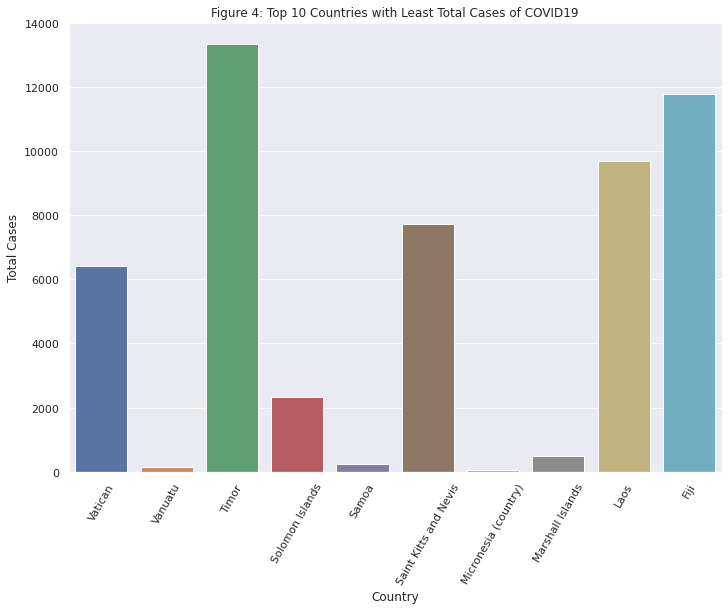

In [136]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax1 = sns.barplot(x = most_cases_countries['location'].tail(10).sort_values(ascending = False),
                 y = most_cases_countries['total_cases'].tail(10).sort_values(ascending = True))
ax1.set_xlabel('Country')
ax1.set_ylabel("Total Cases")
plt.xticks(rotation = 60)
ax1.set_title("Figure 4: Top 10 Countries with Least Total Cases of COVID19")


<h3><strong>Q: What are the 10 countries with the highest weekly cases? </strong></h3>

In [36]:
most_cases_weekly = countries_mean_df.sort_values(by="weekly_cases", ascending = False)
most_cases_weekly.head(10)

,location,new_cases,new_deaths,total_cases,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
188,United States,70427.688995,1279.636364,8.708471e+06,490359.808612,8890.794258,974196.449761,17614.777512
25,Brazil,29982.689295,726.446475,4.133245e+06,206110.749347,4983.678851,403430.953003,9750.853786
80,India,27769.119512,387.134146,4.572099e+06,193121.968293,2703.087805,383919.402439,5392.946341
146,Russia,10614.623472,221.413203,1.406161e+06,73807.168704,1527.444988,146407.970660,3005.293399
187,United Kingdom,10444.278729,307.464548,1.096150e+06,72813.058680,2145.454768,144922.227384,4269.850856
64,France,9932.389423,217.747596,1.093913e+06,68145.372596,1512.985577,133660.764423,2993.182692
168,Spain,7803.196078,177.102941,9.498895e+05,54479.205882,1235.252451,108548.860294,2444.987745
87,Italy,7880.542787,249.743276,8.403669e+05,53925.728606,1731.459658,105286.501222,3424.555012
68,Germany,6244.169492,177.876513,6.797313e+05,43173.590799,1237.113801,85254.615012,2447.927361
38,Colombia,6158.139037,163.483957,8.207785e+05,42873.176471,1139.155080,85287.561497,2265.689840


Text(0.5, 1.0, 'Figure 5: Top 10 Countries with Highest Weekly Cases of COVID19')

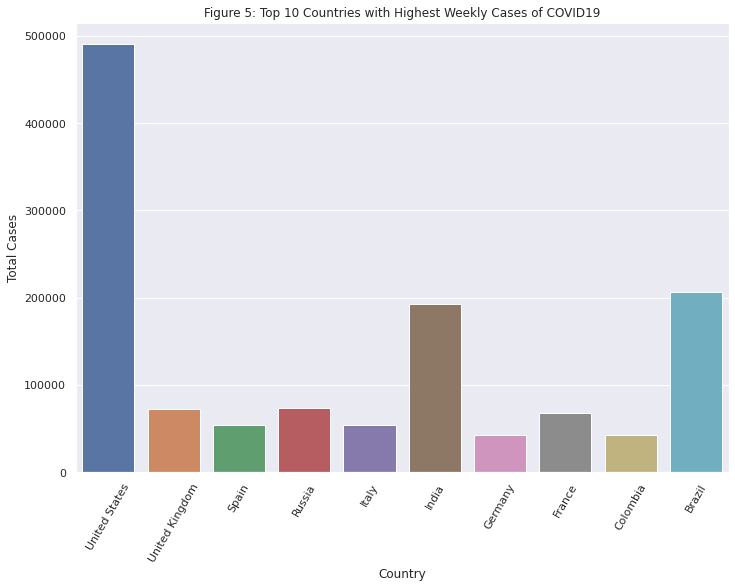

In [137]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax1 = sns.barplot(x = most_cases_weekly['location'].head(10).sort_values(ascending = False),
                 y = most_cases_weekly['weekly_cases'].head(10).sort_values(ascending = True))
ax1.set_xlabel('Country')
ax1.set_ylabel("Total Cases")
plt.xticks(rotation = 60)
ax1.set_title("Figure 5: Top 10 Countries with Highest Weekly Cases of COVID19")


<h3><strong>Q: What are the 10 countries with the least weekly cases? </strong></h3>

In [43]:
most_cases_weekly.tail(10)

,location,new_cases,new_deaths,total_cases,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
71,Grenada,0.413408,0.002793,52.407821,2.863128,0.019553,5.589385,0.039106
62,Fiji,0.182825,0.005540,32.634349,1.257618,0.038781,2.362881,0.077562
96,Laos,0.134831,0.000000,27.185393,0.865169,0.000000,1.584270,0.000000
148,Saint Kitts and Nevis,0.121127,0.000000,21.754930,0.797183,0.000000,1.436620,0.000000
162,Solomon Islands,0.116883,0.000000,15.233766,0.740260,0.000000,1.409091,0.000000
192,Vatican,0.072193,0.000000,17.112299,0.491979,0.000000,0.978610,0.000000
151,Samoa,0.025641,0.000000,2.162393,0.136752,0.000000,0.230769,0.000000
111,Marshall Islands,0.028986,0.000000,3.623188,0.130435,0.000000,0.260870,0.000000
191,Vanuatu,0.024000,0.000000,1.112000,0.128000,0.000000,0.128000,0.000000
115,Micronesia (country),0.018868,0.000000,1.000000,0.037736,0.000000,0.037736,0.000000


Text(0.5, 1.0, 'Figure 6: Top 10 Countries with Lowest Weekly Cases of COVID19')

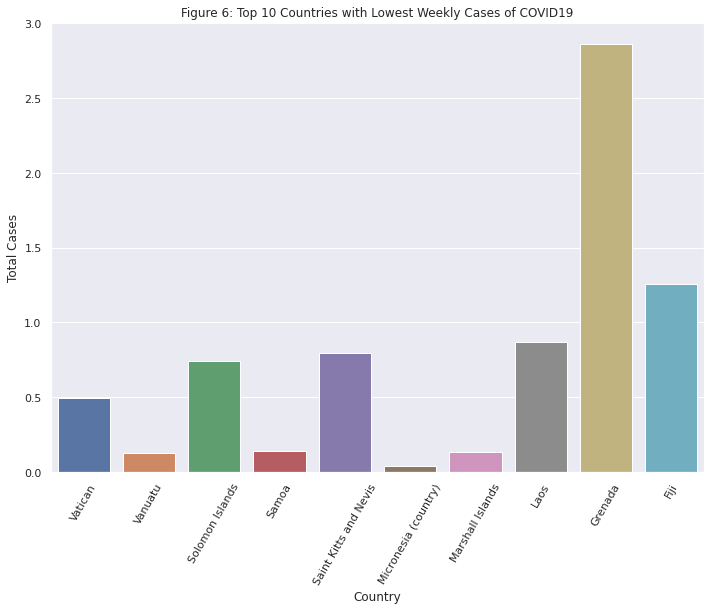

In [138]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax1 = sns.barplot(x = most_cases_weekly['location'].tail(10).sort_values(ascending = False),
                 y = most_cases_weekly['weekly_cases'].tail(10).sort_values(ascending = True))
ax1.set_xlabel('Country')
ax1.set_ylabel("Total Cases")
plt.xticks(rotation = 60)
ax1.set_title("Figure 6: Top 10 Countries with Lowest Weekly Cases of COVID19")


<h3><strong>Q: What are the 10 countries with the highest weekly deaths?</strong></h3>

In [127]:
most_deaths_weekly = countries_mean_df.sort_values(by="weekly_deaths", ascending = False)
most_deaths_weekly.head(10)

,location,new_cases,new_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
188,United States,70427.688995,1279.636364,490359.808612,8890.794258,974196.449761,17614.777512
25,Brazil,29982.689295,726.446475,206110.749347,4983.678851,403430.953003,9750.853786
114,Mexico,5685.800525,511.049869,39505.821522,3546.997375,78292.430446,7013.632546
80,India,27769.119512,387.134146,193121.968293,2703.087805,383919.402439,5392.946341
187,United Kingdom,10444.278729,307.464548,72813.058680,2145.454768,144922.227384,4269.850856
87,Italy,7880.542787,249.743276,53925.728606,1731.459658,105286.501222,3424.555012
146,Russia,10614.623472,221.413203,73807.168704,1527.444988,146407.970660,3005.293399
64,France,9932.389423,217.747596,68145.372596,1512.985577,133660.764423,2993.182692
68,Germany,6244.169492,177.876513,43173.590799,1237.113801,85254.615012,2447.927361
168,Spain,7803.196078,177.102941,54479.205882,1235.252451,108548.860294,2444.987745


Text(0.5, 1.0, 'Figure 7: Top 10 Countries with Highest Weekly Deaths?')

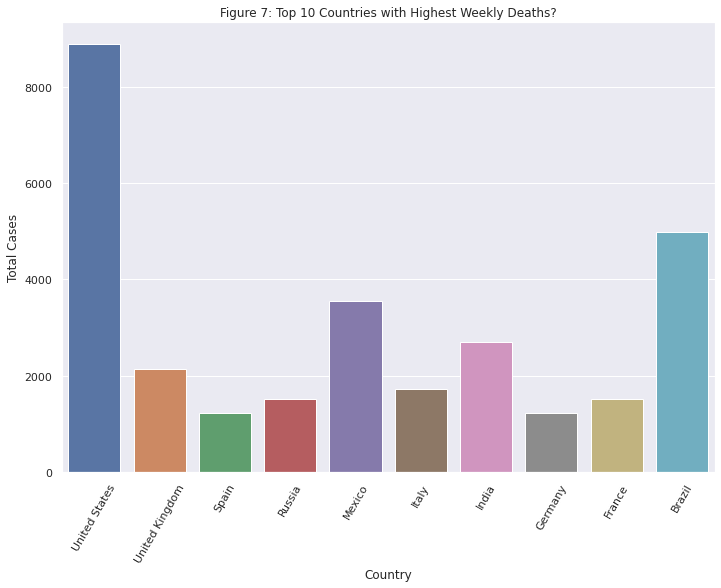

In [139]:
sns.set(rc={'figure.figsize':(11.7,8.279)}, style = 'darkgrid')
ax1 = sns.barplot(x = most_deaths_weekly['location'].head(10).sort_values(ascending = False),
                 y = most_deaths_weekly['weekly_deaths'].head(10).sort_values(ascending = True))
ax1.set_xlabel('Country')
ax1.set_ylabel("Total Cases")
plt.xticks(rotation = 60)
ax1.set_title("Figure 7: Top 10 Countries with Highest Weekly Deaths?")


<h3><strong>Q: What are the 10 countries with the highest weekly deaths?</strong></h3>

In [130]:
most_deaths_weekly.tail(10)

,location,new_cases,new_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
115,Micronesia (country),0.018868,0.0,0.037736,0.0,0.037736,0.0
151,Samoa,0.025641,0.0,0.136752,0.0,0.230769,0.0
148,Saint Kitts and Nevis,0.121127,0.0,0.797183,0.0,1.436620,0.0
50,Dominica,0.435754,0.0,2.910615,0.0,5.497207,0.0
191,Vanuatu,0.024000,0.0,0.128000,0.0,0.128000,0.0
192,Vatican,0.072193,0.0,0.491979,0.0,0.978610,0.0
96,Laos,0.134831,0.0,0.865169,0.0,1.584270,0.0
162,Solomon Islands,0.116883,0.0,0.740260,0.0,1.409091,0.0
111,Marshall Islands,0.028986,0.0,0.130435,0.0,0.260870,0.0
179,Timor,0.547486,0.0,3.111732,0.0,5.360335,0.0
